# **Mileage prediction - Regression Analysis**

**Objectives:**

1) Accuracy: The primary objective is to develop a regression model that accurately predicts the mileage of a vehicle. The model should minimize the difference between the predicted mileage and the actual mileage values.

2) Feature Selection: Identify the most relevant input factors or features that significantly affect the mileage of a vehicle. Through regression analysis, you can determine which variables have the strongest correlation with mileage and include them in the model.

3) Model Interpretation: Understand the relationships between the independent variables (such as engine size, vehicle weight, aerodynamics, etc.) and the dependent variable (mileage). Regression analysis allows you to interpret the impact of each variable on the predicted mileage and determine their relative importance.

4) Generalization: Develop a model that can be generalized to a broader population of vehicles. The regression analysis should be robust enough to provide accurate predictions for different types of vehicles, rather than being limited to a specific make or model.

5) Model Evaluation: Assess the performance and reliability of the regression model through various evaluation metrics. These metrics may include mean squared error, R-squared, or root mean squared error. The objective is to ensure that the model performs well on both the training data and unseen data, indicating its predictive capability.

  By achieving these objectives, mileage prediction regression analysis can provide valuable insights for vehicle manufacturers, researchers, and consumers, enabling them to make informed decisions regarding fuel efficiency, environmental impact, and cost-effectiveness.








**Data Source:**

This dataset was taken from the statlib library which is maintained at carnegie mellon university. The dataset was used in the 1983 American statistical Association Exposition.
"The dataset is slightly modified version of the dataset provided in the statlib library.in line with the use by Ross Quinlan(1993) in predicting "mpg",8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg-data-original".
"The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete an 5 continuos attributes."(Quinlan,1993)

**Attribute information:**

1. mpg: continuos
2. cylinder: multi-valued discrete
3.displcement: continuous
4.horsepower: continuous
5.weight: continuous
6.acceleration: continuous
7.model year: multi-valued discrete
8.origin:multi-valued discrete
9.car name: string(unique for each instance
     


**Import library**

In [5]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

**Import Data**

In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv")


In [57]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [58]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

**Describe data**

**Data Visualization**

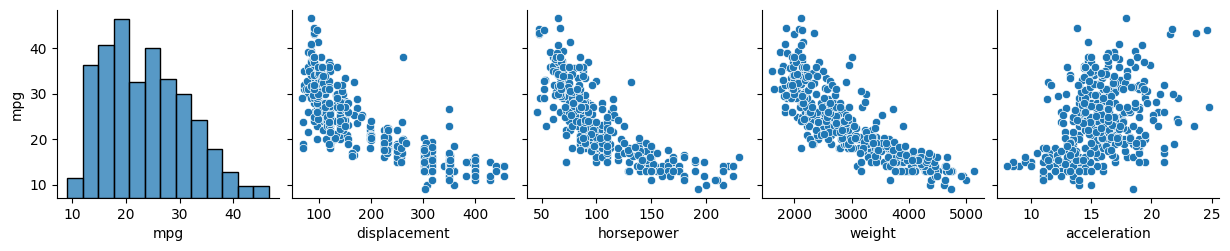

In [59]:
sns.pairplot(df,x_vars=['mpg','displacement', 'horsepower', 'weight',
       'acceleration'],y_vars=['mpg']);

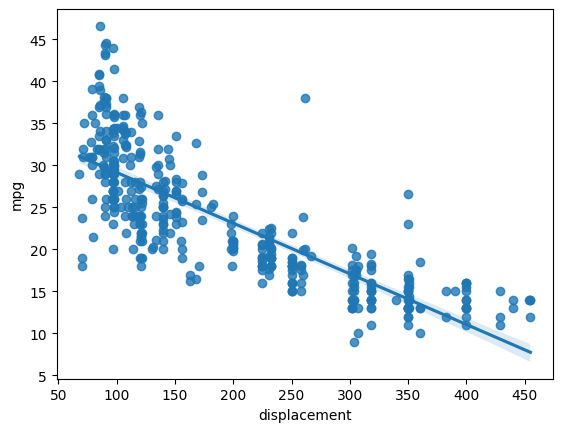

In [60]:
sns.regplot(x = 'displacement', y = 'mpg', data = df);

**Data Preprocessing**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [62]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [63]:
df.corr()

<ipython-input-63-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


**Removing missing values**

In [65]:
df = df.dropna()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**Define Target Variable (y) and Feature Variables (X)**


In [67]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [68]:
y = df['mpg']

In [69]:
y.shape

(392,)

In [70]:
x = df[['displacement', 'horsepower', 'weight',
       'acceleration']]

In [71]:
x.shape

(392, 4)

In [72]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


**Scaling data**

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
ss = StandardScaler()

In [75]:
x = ss.fit_transform(x)

In [76]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [77]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


**Train test split**

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=2529)

In [80]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((294, 4), (98, 4), (294,), (98,))

**Regression Model**

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr = LinearRegression()

In [83]:
lr.fit(x_train, y_train)

LinearRegression()

In [85]:
lr.intercept_

23.464404729340036

In [86]:
lr.coef_

array([-0.82134735, -2.00007128, -4.12715281, -0.16529152])

mileage=23.4-0.82Displacement-2Horsepower-4.12Weight-0.165Acceleration+error

**Predict Test Data**

In [87]:
y_pred = lr.predict(x_test)

In [88]:
y_pred

array([18.45029029, 15.11872575, 14.25951901, 23.63777162, 29.77227939,
       23.78289678, 26.46274613, 24.63477759, 15.10361067, 11.92089347,
       24.03667612, 28.03774179, 31.7791986 , 31.04942136, 18.34939414,
       19.34562679, 28.14901371, 32.26833498, 31.23336778, 27.1706607 ,
       18.90264044, 22.69158865, 26.30616149, 32.53334114, 20.7455229 ,
        8.43604922, 21.96939005, 18.16644283, 24.9187207 , 14.95041612,
       23.27573018, 17.10008397,  9.28416594, 30.02859334, 20.49341373,
       29.16402497, 24.1851619 , 21.82468561, 10.45764414, 12.99758931,
       21.55287965, 19.9763373 ,  5.81701795, 17.83479167, 22.69872144,
       29.39987303, 13.2638446 , 25.84303202, 29.29886179, 22.44116443,
       22.30857618, 16.57432268, 24.06827363, 30.19019859, 10.04817173,
        9.3533171 , 28.14495274, 23.67665202, 20.07936568, 30.77322956,
       20.95405256, 26.72684739, 23.16157669, 14.10789682, 24.37223149,
       26.84731155, 15.26437637, 24.21355   , 30.81705563, 14.86

**Model Accuracy**

In [92]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error,r2_score

In [93]:
mean_absolute_error(y_test, y_pred)

3.2128193572784176

In [94]:
mean_absolute_percentage_error(y_test, y_pred)

0.14486145216628085

In [95]:
r2_score(y_test,y_pred)

0.7174961864188241

**Polynomial Regression**

In [96]:
from sklearn.preprocessing import PolynomialFeatures

In [97]:
Poly = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [98]:
x_train2 = Poly.fit_transform(x_train)

In [99]:
x_test2 = Poly.fit_transform(x_test)

In [100]:
lr.fit(x_train2,y_train)

LinearRegression()

In [101]:
lr.intercept_

21.295474126506168

In [103]:
lr.coef_

array([-2.78636354, -5.39053361, -1.15797282, -1.14970885,  1.35645181,
       -0.16432177, -0.03040911,  1.09523004, -0.67580641,  0.78299062])

In [104]:
y_pred_poly = lr.predict(x_test2)

**Model Accuracy**

In [105]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [106]:
mean_absolute_error(y_test,y_pred_poly)

2.6281657513434173

In [108]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.11292169321652239

In [109]:
r2_score(y_test,y_pred_poly)

0.7705431136534491

**Explanation**

Mileage prediction regression analysis refers to the process of using regression techniques to estimate or predict the mileage or fuel efficiency of a vehicle. Regression analysis is a statistical method used to model the relationship between a dependent variable (in this case, mileage) and one or more independent variables (such as engine size, weight, aerodynamics, etc.).

Here's an explanation of the steps involved in mileage prediction regression analysis:

  1.Data Collection: The first step is to gather a dataset that includes information about various factors that could potentially influence mileage, such as engine specifications, vehicle weight, transmission type, aerodynamics, tire pressure, driving conditions, etc. The dataset should contain records of vehicles along with their corresponding mileage values.

   2.Data Preprocessing: Once the dataset is collected, it needs to be preprocessed. This involves handling missing values, removing outliers, and transforming variables if needed. For example, categorical variables like transmission type may need to be encoded into numerical values.

   3.Variable Selection: The next step is to identify which independent variables are most relevant in predicting mileage. This can be done through techniques like correlation analysis, stepwise regression, or domain knowledge. Selecting the right variables is crucial to building an accurate prediction model.

   4.Model Building: Once the relevant variables are identified, a regression model is constructed. The choice of regression model depends on the nature of the data and the assumptions being made. Some commonly used regression models for mileage prediction include linear regression, multiple linear regression, polynomial regression, and regression with regularization techniques like ridge regression or lasso regression.

   5.Model Evaluation: After building the regression model, it needs to be evaluated to assess its performance and accuracy. This is typically done by using evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), or R-squared value. Cross-validation techniques may also be employed to validate the model's performance on unseen data.

   6.Prediction: Once the regression model is deemed satisfactory, it can be used for mileage prediction. Given the independent variables (such as engine specifications, weight, etc.) of a new vehicle, the model can estimate the expected mileage for that vehicle.

It's important to note that mileage prediction regression analysis is a simplified explanation, and there may be additional considerations and complexities involved in real-world scenarios. The accuracy of the predictions depends on the quality and representativeness of the dataset, the appropriateness of the regression model, and the assumptions made during the analysis.



